
# TP XOR avec Réseaux de Neurones Multi-Couches

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    result = 1 / (1 + np.exp(-x))
    assert np.all((result >= 0) & (result <= 1)), "Sigmoid doit être entre 0 et 1"
    return result

def sigmoid_derivative(x):
    s = sigmoid(x)
    result = s * (1 - s)
    assert np.all((result >= 0) & (result <= 0.25)), "Dérivée de la sigmoïde doit être entre 0 et 0.25"
    return result

def relu(x):
    result = np.maximum(0, x)
    assert np.all(result >= 0), "ReLU doit être >= 0"
    return result

def relu_derivative(x):
    result = (x > 0).astype(float)
    assert np.all((result == 0) | (result == 1)), "Dérivée de ReLU doit être 0 ou 1"
    return result

def linear(Z):
    result = Z
    assert result.shape == Z.shape, "Linear doit renvoyer un tableau de même forme"
    return result

def linear_derivative(Z):
    result = np.ones_like(Z)
    assert np.all(result == 1), "Dérivée de la fonction linéaire doit être 1 partout"
    return result


In [3]:
# Layer Classe
class Layer:
    def __init__(self, input_size, output_size, activation='linear', seed=None):
        np.random.seed(seed)
        self.W = np.random.randn(input_size, output_size)
        self.b = np.zeros((1, output_size))

        assert self.W.shape == (input_size, output_size), "Dimension W invalide"
        assert self.b.shape == (1, output_size), "Dimension b invalide"

        if activation == 'sigmoid':
            self.activation = sigmoid
            self.activation_derivative = sigmoid_derivative
        elif activation == 'relu':
            self.activation = relu
            self.activation_derivative = relu_derivative
        elif activation == 'linear':
            self.activation = linear
            self.activation_derivative = linear_derivative
        else:
            raise ValueError("Activation non supportée")

    def forward(self, X):
        self.input = X
        self.Z = X @ self.W + self.b
        self.A = self.activation(self.Z)

        assert self.A.shape == (X.shape[0], self.W.shape[1]), "Dimension A invalide"
        return self.A

    def backward(self, dA, lr):
        m = self.input.shape[0]
        dZ = dA * self.activation_derivative(self.Z)
        dW = self.input.T @ dZ / m
        db = np.sum(dZ, axis=0, keepdims=True) / m
        dX = dZ @ self.W.T

        assert dW.shape == self.W.shape, "Mauvaise dimension pour dW"
        assert db.shape == self.b.shape, "Mauvaise dimension pour db"

        self.W -= lr * dW
        self.b -= lr * db
        return dX

In [4]:
# MLP classe
class MLP:
    def __init__(self, layers, learning_rate=0.01):
        self.layers = layers
        self.lr = learning_rate
        self.losses = []

    def forward(self, X):
        for layer in self.layers:
            X = layer.forward(X)
        return X

    def backward(self, y_true, y_pred):
        dA = 2 * (y_pred - y_true)
        for layer in reversed(self.layers):
            dA = layer.backward(dA, self.lr)

    def train(self, X, y, epochs):
        self.losses.clear()
        for epoch in range(epochs):
            y_pred = self.forward(X)
            loss = np.mean((y - y_pred) ** 2)
            self.losses.append(loss)

            if epoch % 200 == 0 or epoch == epochs - 1:
                print(f"Epoch {epoch}, Loss: {loss:.6f}")

            self.backward(y, y_pred)

        print(f"Final Loss: {self.losses[-1]:.6f}")

    def predict(self, X):
        return self.forward(X)

    def plot_losses(self):
        plt.plot(self.losses, label='Training Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss (MSE)')
        plt.title('Loss Vs Epochs')
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

    def _get_weights(self):
        weights = []
        for i, layer in enumerate(self.layers):
            weights.append({
                "layer": i + 1,
                "weights": layer.W.copy(),
                "biases": layer.b.copy()
            })
        return weights


In [8]:
# Jeu de données XOR
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

layers = [
    Layer(2, 4, activation='sigmoid', seed=100),
    Layer(4, 3, activation='relu', seed=8),
    Layer(3, 1, activation='sigmoid', seed=17)
]
model = MLP(layers, learning_rate=0.1)
model.train(X, y, epochs=10000)

# Prédictions
predictions = model.predict(X)
print("\nPrédictions après entraînement :")
for i in range(len(X)):
    print(f"Entrée : {X[i]}, Prédiction : {predictions[i][0]:.4f}, Attendu : {y[i][0]}")
    if y[i][0] == 0:
        assert predictions[i][0] < 0.5, f"Prediction pour {X[i]} devrait être < 0.5"
    else:
        assert predictions[i][0] > 0.5, f"Prediction pour {X[i]} devrait être > 0.5"

Epoch 0, Loss: 0.336548
Epoch 200, Loss: 0.192267
Epoch 400, Loss: 0.166048
Epoch 600, Loss: 0.113633
Epoch 800, Loss: 0.053396
Epoch 1000, Loss: 0.026851
Epoch 1200, Loss: 0.013860
Epoch 1400, Loss: 0.008841
Epoch 1600, Loss: 0.006153
Epoch 1800, Loss: 0.004612
Epoch 2000, Loss: 0.003620
Epoch 2200, Loss: 0.002938
Epoch 2400, Loss: 0.002457
Epoch 2600, Loss: 0.002095
Epoch 2800, Loss: 0.001818
Epoch 3000, Loss: 0.001601
Epoch 3200, Loss: 0.001425
Epoch 3400, Loss: 0.001279
Epoch 3600, Loss: 0.001160
Epoch 3800, Loss: 0.001057
Epoch 4000, Loss: 0.000971
Epoch 4200, Loss: 0.000896
Epoch 4400, Loss: 0.000832
Epoch 4600, Loss: 0.000775
Epoch 4800, Loss: 0.000724
Epoch 5000, Loss: 0.000679
Epoch 5200, Loss: 0.000639
Epoch 5400, Loss: 0.000604
Epoch 5600, Loss: 0.000571
Epoch 5800, Loss: 0.000542
Epoch 6000, Loss: 0.000515
Epoch 6200, Loss: 0.000490
Epoch 6400, Loss: 0.000468
Epoch 6600, Loss: 0.000447
Epoch 6800, Loss: 0.000428
Epoch 7000, Loss: 0.000411
Epoch 7200, Loss: 0.000394
Epoch 74

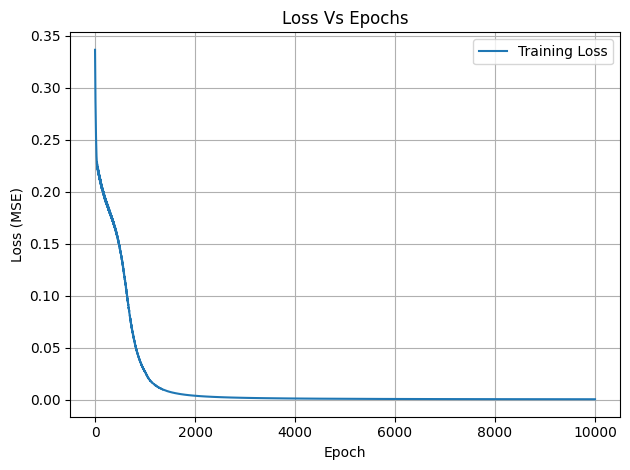


Couche 1:
Poids:
 [[-0.5104085  -1.94123601  2.37287533 -0.8926165 ]
 [ 1.86793176 -1.48174373  1.51302495 -1.64340739]]
Bias:
 [[ 0.01092418  0.9950838  -1.30435296  1.00608571]]

Couche 2:
Poids:
 [[ 0.24069352  1.02640665 -1.90953862]
 [-1.88392042 -3.29406059  2.85101126]
 [ 2.90096313  3.40264676  0.00675042]
 [ 0.49255545 -2.65434942  2.13464874]]
Bias:
 [[ 0.28117298 -0.59678153 -0.17084369]]

Couche 3:
Poids:
 [[ 2.560184  ]
 [-4.63414663]
 [-1.68931245]]
Bias:
 [[0.1113979]]


In [9]:
model.plot_losses()
weights = model._get_weights()
print("===============================================")
for info in weights:
    print(f"\nCouche {info['layer']}:")
    print("Poids:\n", info['weights'])
    print("Bias:\n", info['biases'])
    
print("===============================================")